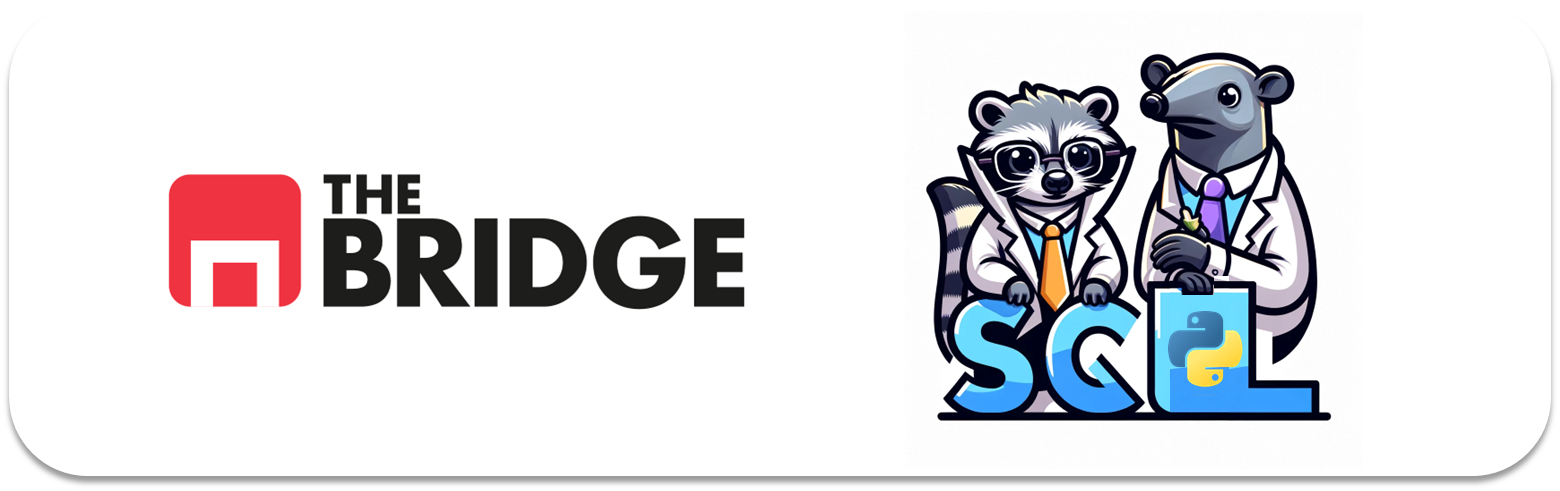

# SQL con Python: JOIN Ejemplos (II)


### Preparación

Como en la sesión anterior, importamos librerías, creamos la conexión a la base de datos, creamos el cursor y nuestra función para lanzar queries. Además también recuperamos el modelo de datos para tener claro que cruces pueden hacerse. 

In [ ]:
import pandas as pd
import sqlite3

# Conectamos con la base de datos chinook.db
connection = sqlite3.connect("./data/chinook_joins.db")

# Obtenemos un cursor que utilizaremos para hacer las queries
cursor_bootcamp = connection.cursor()

In [ ]:
def sql_query(query):
    cursor_bootcamp.execute(query)
    ans = cursor_bootcamp.fetchall()
    names = [description[0] for description in cursor_bootcamp.description]
    return pd.DataFrame(ans,columns=names)


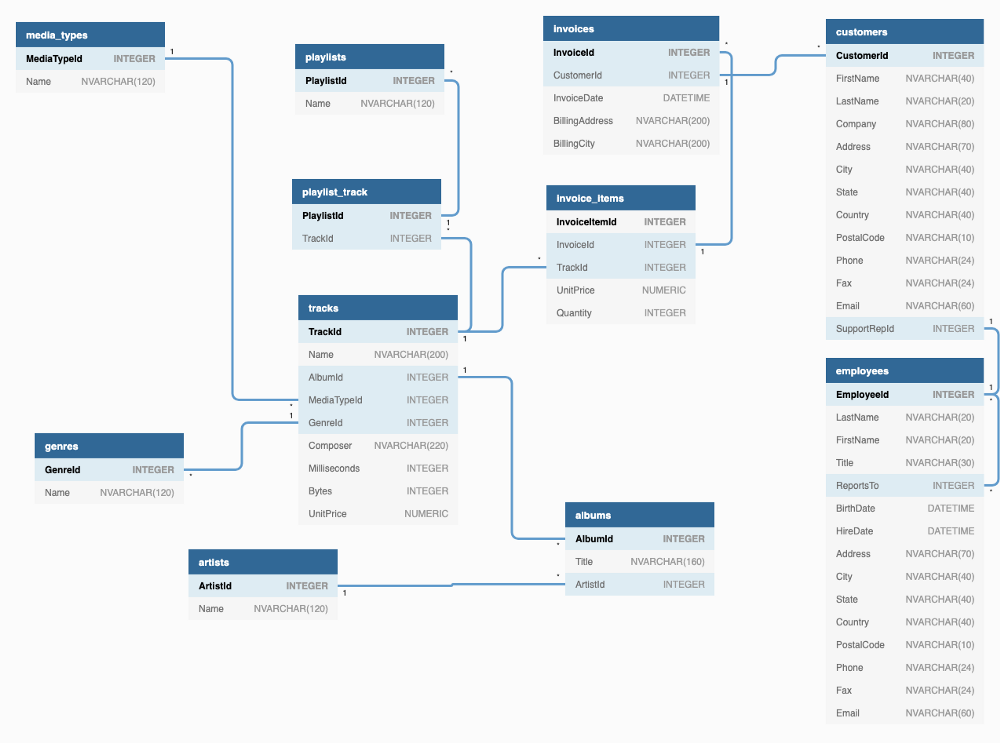

### Right Join

Este es el JOIN en el que manda la tabla de la "derecha", la que ponemos detrás del  `JOIN`. Es la tabla de la que queremos mantener todas las filas y pegarle campos de otra tabla aunque no haya cruce, en cuyo caso se rellenarán con nulos (NULL o NaN si lo pasamos a Pandas)

In [ ]:
# Hagamos el inverso del anterior pero por la derecha: Queremos pegar a cada disco las canciones
# Manda la tabla de álbumes (albums) 
# sobre el de canciones (tracks)
# Como en la sesión anterior la clave de cruce es AlbumId (Foreing_Key en tracks, Primary_Key en albums)


Aquí las puntualizaciones son dos:
1. Aquí no hay albumid que sí esté en albums y no esté en tracks por eso no hay nulos en el campo `name`
2. Como ahora comprobaremos el número de regitros ha crecido porque ahora hay tantas lineas por album como canciones tenga el album, mientras que la tabla anterior de albums el campo AlbumId era único.

### Inner Join

Veamos ahora un ejemplo de Inner Join, es decir aquel en el que sólo quiero quedarme con las filas que tengan valores comunes en las dos tablas (aquellas filas de una tabla cuyo identificador no aparezca en la clave de la otra no se tendrán en cuenta)

In [ ]:
# Vamos a quedarnos ahora con las canciones para las cuales si haya disco


Aquí lo que podemos observar es:
1. No hay nulos, claro se cojen filas que existen en una y otra tabla.
2. Se ha reducido el número de salidas respecto al left join que hicimos (aunque no te des cuenta ahora si te haces una select de tracks podrás comprobar que tiene  3503 cacniones). Ha quitado las canciones que no tienen album.

### Full join

El full join es el que se queda todos los cruces posibles (por valores existentes) aunque haya nulos. En el caso de sqlite3 no admite Full Join por lo que hay que simularlo. Como te dejo a continuación, pero dado que es un caso excepcional (trabajar con LEFT JOIN es casi lo más que vamos a hacer), no vamos a entrar en mucho más detalle

[Nota: Excepcional en nuestro Bootcamp/Data Science, puede que como usuario de SQL en tu empresa o en tu vida tengas que hacer miles de Full Outer Join]

In [ ]:
#FULL JOIN
#FULL JOIN isn't supported in sqlite, 
#so we use a LEFT JOIN + RIGHT JOIN(inverse LEFT JOIN) as a workaround

query = '''
SELECT * 
FROM invoice_items AS a
LEFT JOIN tracks AS b
ON a.trackid = b.trackid
UNION ALL -- usa el union all que permite unir  la salida de dos queries por separado, no es una subquery una dentro de otra.
SELECT *
FROM tracks AS a
LEFT JOIN invoice_items AS b
ON a.trackid =b.trackid;
'''

sql_query(query)